In [1]:
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import os
import torch


In [2]:
from zipfile import ZipFile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
with ZipFile('/content/drive/MyDrive/dataset_simp.zip','r') as zip:
  zip.extractall(path='/')

In [6]:
dataset_sons = ImageFolder('/dataset_simp',transform=ToTensor())
len(dataset_sons)

9000

In [7]:

# classes
print(dataset_sons.classes)

['cbart', 'charles', 'homer', 'krusty', 'lisa', 'marge', 'milhouse', 'moe', 'principal', 'sned']


In [8]:
from torch.utils.data import random_split

test_size = 1000
train_size = len(dataset_sons)-test_size
train_ds,test_ds = random_split(dataset_sons, [train_size,test_size])
len(train_ds),len(test_ds)

(8000, 1000)

In [9]:
from torch.utils.data import DataLoader

In [10]:
batch_size = 64
train_dl = DataLoader(train_ds,batch_size,num_workers=4,pin_memory=True)
test_dl = DataLoader(test_ds,batch_size,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffff'

In [12]:
def show_example(img,label):
    print('Label: ',dataset_sons.classes[label],"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  cbart (0)


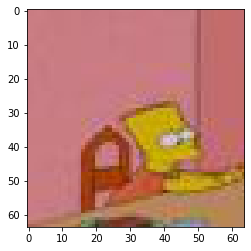

In [15]:

show_example(*dataset_sons[756])

In [16]:
for images,labels in train_dl:
    print(labels[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(4)


In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class SimpSonsModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            #input 3x64x64
            nn.Conv2d(3,32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            #output 64,32,32

            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            #output 128x16x16

            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            #output 256,8,8


            nn.Flatten(),
            nn.Linear(256*8*8,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10))
    
    def forward(self,xb):
        return self.network(xb)

In [19]:
model_simp = SimpSonsModel()
model_simp

SimpSonsModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_featu

In [20]:
for images,labels in train_dl:
    print(images.shape)
    out = model_simp(images)
    print(out.shape)
    print(out[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([64, 3, 64, 64])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([64, 10])
tensor([ 0.0371,  0.0264,  0.0222, -0.0306, -0.0402,  0.0391,  0.0049,  0.0158,
        -0.0401,  0.0094], grad_fn=<SelectBackward>)


In [58]:

for images,labels in test_dl:
    print(images.shape)

    out = model_simp(images)
    print(out.shape)
    print(labels.shape)
    loss = F.cross_entropy(out,labels)
    print(loss)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([64, 3, 64, 64])


RuntimeError: ignored

In [22]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device, non_blocking= True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

In [23]:
device = get_default_device()
device

device(type='cuda')

In [59]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl,device)
to_device(model_simp, device)

SimpSonsModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_featu

In [60]:

@torch.no_grad()
def fit(epochs,lr,train_loader,test_loader,opt_func = torch.optim.SGD):
    optimizer = opt_func(model_simp.parameters(),lr)

    for epoch in range(epochs):
        model.train()
        for images,labels in train_loader:
            out = model_simp(images)
            loss = F.cross_entropy(out,labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        loss = F.cross_entropy(out,labels)
        
        print(loss.item())


In [61]:
model = to_device(SimpSonsModel(), device)

In [62]:
num_epochs = 10
lr = 0.0001


In [63]:
opt_function = torch.optim.Adam
optimizer = opt_function(model_simp.parameters(),lr=0.001)


In [64]:
for i in range(10):
  
  model_simp.train()
  for images,labels in train_dl:
    out = model_simp(images)
    loss = F.cross_entropy(out,labels)
    # loss.requires_grad = True
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    with torch.no_grad():
      if (i+1)%10 == 0:
        

SyntaxError: ignored

In [68]:
with torch.no_grad():
  for images,labels in test_dl:
    
    print(images.shape)
    out = model_simp(images)
    _, preds = torch.max(out, 1)
    acc = torch.tensor(torch.sum(preds == labels).item()/ len(preds))
    print("Accuracy:",acc.item()*100)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([64, 3, 64, 64])
Accuracy: 76.5625
torch.Size([64, 3, 64, 64])
Accuracy: 73.4375
torch.Size([64, 3, 64, 64])
Accuracy: 76.5625
torch.Size([64, 3, 64, 64])
Accuracy: 64.0625
torch.Size([64, 3, 64, 64])
Accuracy: 70.3125
torch.Size([64, 3, 64, 64])
Accuracy: 75.0
torch.Size([64, 3, 64, 64])
Accuracy: 81.25
torch.Size([64, 3, 64, 64])
Accuracy: 76.5625
torch.Size([64, 3, 64, 64])
Accuracy: 75.0
torch.Size([64, 3, 64, 64])
Accuracy: 75.0
torch.Size([64, 3, 64, 64])
Accuracy: 75.0
torch.Size([64, 3, 64, 64])
Accuracy: 78.125
torch.Size([64, 3, 64, 64])
Accuracy: 68.75
torch.Size([64, 3, 64, 64])
Accuracy: 79.6875
torch.Size([64, 3, 64, 64])
Accuracy: 71.875
torch.Size([40, 3, 64, 64])
Accuracy: 80.0000011920929


In [69]:
torch.save(model.state_dict(), 'simpsons_cnn.pth')

In [70]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: principal , Predicted: principal


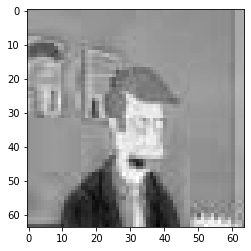

In [81]:
img, label = test_ds[234]
plt.imshow(img[0], cmap='gray')
print('Label:', dataset_sons.classes[label], ', Predicted:', dataset_sons.classes[predict_image(img, model_simp)])